In [2]:
# Imported Libraries
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler




In [3]:
df_train = pd.read_csv('../Resources/train_data.csv')

Accuracy: 0.999622290661863
Classification Report:Default Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34352
           1       0.96      0.83      0.89        66

    accuracy                           1.00     34418
   macro avg       0.98      0.92      0.95     34418
weighted avg       1.00      1.00      1.00     34418

[[34350     2]
 [   11    55]]


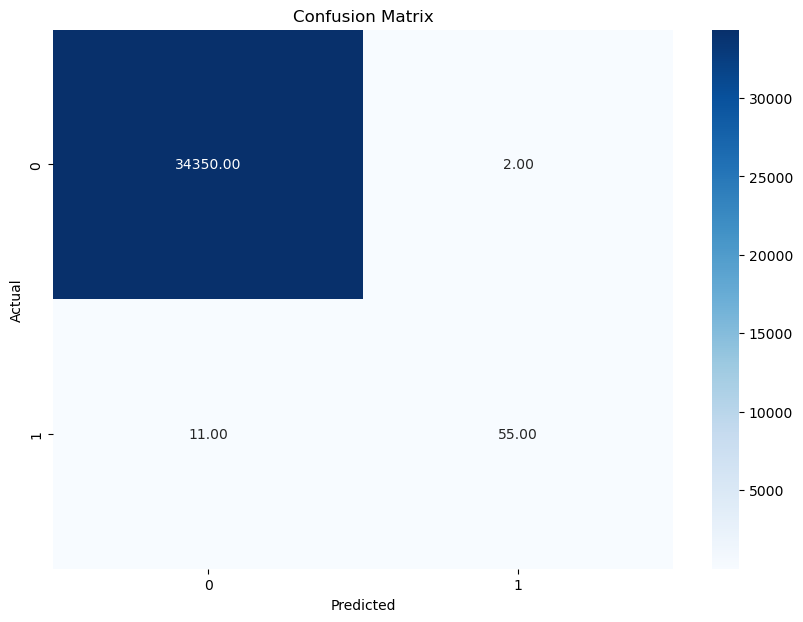

In [10]:
# Split the data into features and target
X = df_train.drop('Class', axis=1) 
y = df_train['Class']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, y_train)

# Evaluate the model
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print('Classification Report:Default Random Forest')
print(report)

# Create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Using SMOTE to oversample


In [12]:

# Split the data into features and target
X = df_train.drop('Class', axis=1) 
y = df_train['Class']  

# Handle imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the model
rf2_model = RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
rf2_model.fit(X_train, y_train)

# Make predictions using the testing data
predictions = rf2_model.predict(X_test)

# Evaluate the model
y_pred2 = rf2_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy2}')
print('Classification Report: SMOTE Tuned Random Forest')
print(report2)

# Create Confusion Matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(conf_matrix2)


Accuracy: 0.9998835381121528
Classification Report: SMOTE Tuned Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34434
           1       1.00      1.00      1.00     34258

    accuracy                           1.00     68692
   macro avg       1.00      1.00      1.00     68692
weighted avg       1.00      1.00      1.00     68692

[[34426     8]
 [    0 34258]]


In [13]:
# Split the data into features and target
X = df_train.drop('Class', axis=1) 
y = df_train['Class']  

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the model
rf3_model = RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
rf3_model.fit(X_train, y_train)

# Make predictions using the testing data
predictions = rf3_model.predict(X_test)

# Evaluate the model
y_pred = rf3_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report: RUS Tuned Random Forest')
print(report2)

# Create Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.999622290661863
Classification Report: RUS Tuned Random Forest
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        82
           1       0.95      0.87      0.91        62

    accuracy                           0.92       144
   macro avg       0.93      0.92      0.92       144
weighted avg       0.92      0.92      0.92       144

[[79  3]
 [ 8 54]]
